In [1]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

## 1. DataSets

In [4]:
training_data = datasets.FashionMNIST(
    root = 'data',
    train = True,
    download = True,
    transform = ToTensor()
)

100.0%


Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



100.0%


Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



100.0%


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



100.0%

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



In [5]:
len(training_data)

60000

In [6]:
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [7]:
len(test_data)

10000

In [8]:
training_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [9]:
image, label = training_data[0]

In [10]:
image.shape


torch.Size([1, 28, 28])

In [11]:
label

9

In [12]:
image.squeeze().shape

torch.Size([28, 28])

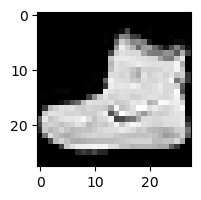

In [13]:
plt.figure(figsize = (2,2))
plt.imshow(image.squeeze(),cmap = 'gray')

In [14]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

labels_map[label]

'Ankle Boot'

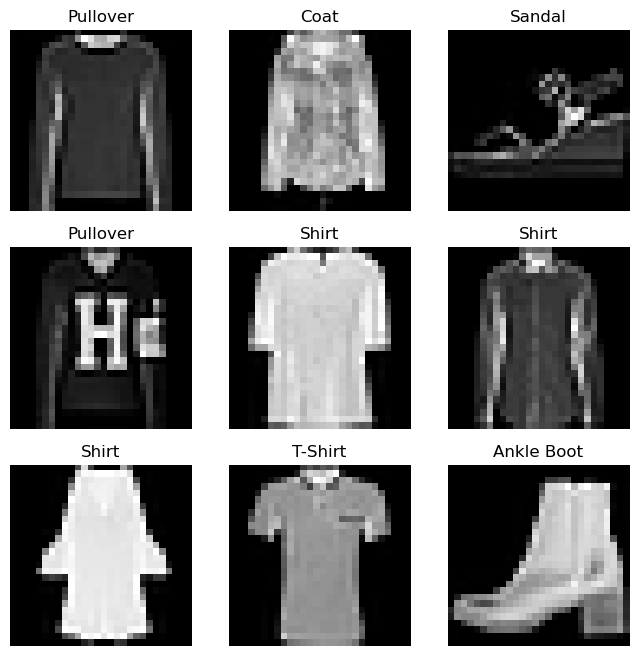

In [15]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## 2. DataLoaders

In [16]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data,batch_size = 64,shuffle = True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [23]:
## First Way
for images, labels in train_dataloader:
    print(images.size())
    break

torch.Size([64, 1, 28, 28])


In [24]:
# Second Way
data_iter = iter(train_dataloader)
images, labels = next(data_iter)

In [25]:
images.size()

torch.Size([64, 1, 28, 28])

In [26]:
img = images[2].squeeze()
label = labels[2]

In [27]:
label.item()

7

In [28]:
labels_map[label.item()]

'Sneaker'

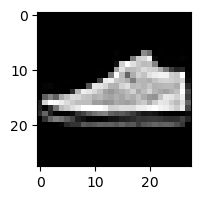

In [29]:
plt.figure(figsize=(2,2))
plt.imshow(img, cmap="gray")
plt.show()